# 04_1.One Sample t-test
- https://pingouin-stats.org/build/html/generated/pingouin.ttest.html#pingouin.ttest

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
ost_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/04_5.Education.csv', encoding="cp949")
ost_df.head()

,학과,학년,교양만족도,전공만족도,비교과만족도,전체만족도
0,1,1,47.6,40.5,40.0,46.7
1,1,1,33.3,35.7,33.3,33.6
2,1,1,50.0,52.4,50.0,50.4
3,1,1,35.7,28.5,40.0,36.1
4,1,1,54.7,92.8,43.3,56.2


### 2.2 자료구조 살펴보기

In [4]:
ost_df.shape

(286, 6)

In [5]:
ost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학과      286 non-null    int64  
 1   학년      286 non-null    int64  
 2   교양만족도   286 non-null    float64
 3   전공만족도   286 non-null    float64
 4   비교과만족도  286 non-null    float64
 5   전체만족도   286 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 13.5 KB


In [6]:
ost_df.columns

Index(['학과', '학년', '교양만족도', '전공만족도', '비교과만족도', '전체만족도'], dtype='object')

## 3.기술통계

In [7]:
# 수치형 변수
ost_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
학과,286.0,2.85,1.02,1.0,2.00,3.0,4.00,4.0
학년,286.0,2.56,1.05,1.0,2.00,2.0,3.75,4.0
교양만족도,286.0,50.21,16.87,14.4,40.40,50.0,58.90,85.7
전공만족도,286.0,56.29,19.80,21.4,45.50,50.0,68.72,100.0
비교과만족도,286.0,47.29,16.85,20.0,35.00,50.0,56.60,83.3
전체만족도,286.0,51.17,15.08,20.4,41.72,49.7,60.00,85.1


In [9]:
ost_df.agg({"교양만족도": ["count", "mean", "std", "min", "max", "median", "skew", "kurtosis"]}).T \
    .round(2)

,count,mean,std,min,max,median,skew,kurtosis
교양만족도,286.0,50.21,16.87,14.4,85.7,50.0,0.2,-0.23


## 4.t-test

### 4.1 차이가 있는 경우(two-sided)

In [15]:
# two-sided
pg.ttest(ost_df["교양만족도"], 50, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.213,285,two-sided,0.831,"[48.25, 52.18]",0.013,0.068,0.055


In [12]:
# two-sided
pg.ttest(ost_df['전공만족도'], 50, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.369,285,two-sided,0.0,"[53.98, 58.59]",0.317,5.339e+04,1.0


In [13]:
# two-sided
pg.ttest(ost_df['비교과만족도'], 50, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.721,285,two-sided,0.007,"[45.33, 49.25]",0.161,2.469,0.774


In [14]:
# two-sided
pg.ttest(ost_df['전체만족도'], 50, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.307,285,two-sided,0.192,"[49.41, 52.92]",0.077,0.154,0.256


### 4.2 양측과 단측 검정 비교(less)

In [21]:
# two-sided
pg.ttest(ost_df['전공만족도'], 50, alternative = "greater").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.369,285,greater,0.0,"[54.35, inf]",0.317,1.068e+05,1.0


In [22]:
# two-sided
pg.ttest(ost_df['비교과만족도'], 50, alternative = "less").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.721,285,less,0.003,"[-inf, 48.93]",0.161,4.938,0.858


## 5.가정검정

### 5.1 정규성 검정

In [16]:
pg.normality(ost_df).T.round(3)

,학과,학년,교양만족도,전공만족도,비교과만족도,전체만족도
W,0.852854,0.865003,0.960308,0.961557,0.960419,0.974286
pval,0.0,0.0,0.0,0.000001,0.0,0.000051
normal,False,False,False,False,False,False


### 5.2 이상치제거

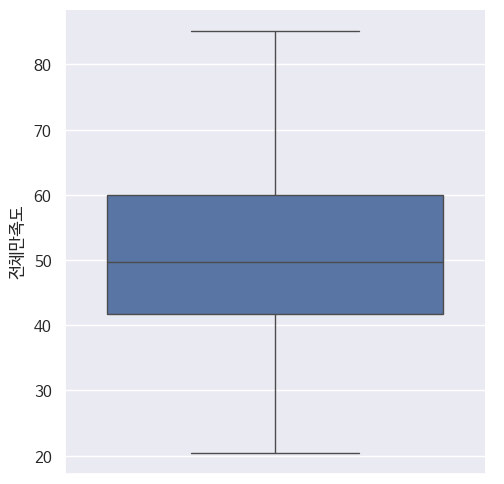

In [20]:
# 한글 폰트 인식
sns.catplot(data = ost_df,
            y = "전체만족도",
            kind = "box")
plt.show()

## 6.비모수 통계

In [23]:
# 비모수통계
pg.wilcoxon(ost_df['교양만족도'] - 50, alternative = "two-sided").round(3)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,12979.5,two-sided,0.765,-0.023,NaN


In [24]:
# 비모수통계
pg.wilcoxon(ost_df['전공만족도'] - 50, alternative = "two-sided").round(3)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,9189.5,two-sided,0.0,0.343,NaN


In [25]:
# 비모수통계
pg.wilcoxon(ost_df['비교과만족도'] - 50, alternative = "two-sided").round(3)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,10326.0,two-sided,0.003,-0.223,NaN


In [26]:
# 비모수통계
pg.wilcoxon(ost_df['전체만족도'] - 50, alternative = "two-sided").round(3)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,18518.5,two-sided,0.583,0.038,NaN
